## Locality Sensitive Hashing
#### Davy

In [1]:
# Reload local python files every 2 seconds
            
%load_ext autoreload
%autoreload 2

In [2]:
import os
import time

import numpy as np
import pandas as pd
import random as rd
import matplotlib.pyplot as plt

from EstimatedJaccard import *
from TrueJaccard import *


from collections import Counter

### Section 1: Construct LSH Hash Tables for All News Article

####   (A)Load $bitvector\_all.csv$. Construct a feature vector for each movie plot article in the dataset $(D)$. Please report the number of articles $(|D|)$ and the number of features $(n)$ for the loaded data.

In [3]:
## read *.csv file in python environment
path = "bitvector_all_1gram.csv"

if os.path.exists(path):
    print("loading file now...")
    bit = pd.read_csv("bitvector_all_1gram.csv", header = None, sep='\t')
else:
    print("The file does not exist.")

loading file now...


In [4]:
## print the document and scan the data
bit

,0,1,2,3,4,5,6,7,8,9,...,39220,39221,39222,39223,39224,39225,39226,39227,39228,39229
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,western
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,short
2,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,biographical
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,comedy
4,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,drama
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,drama
4996,4997,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,drama
4997,4998,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,drama
4998,4999,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,comedy


In [5]:
#derive document into 3 components, movie id as M_id, word_features into M_feature and movie_genre into M_gen 
bit = bit.to_numpy()

M_id = bit[:,0]
M_gen = bit[:,39229]
M_feature= bit[:,1:39229]

In [6]:
## print the dimensionality of M_feature
print(M_feature.shape)
print(M_id.shape)
print(M_gen.shape)

n = M_feature.shape[1]
D = M_feature.shape[0]

(5000, 39228)
(5000,)
(5000,)


In [7]:
n 

39228

In [8]:
D

5000

From above code, we clearly identified the number of articles $|D|$ = 5,000 and the number of features $n$ = 39,228 

####    (B) Construct a family of MinHash functions in the LSH family. You can choose a prime number, denoted as $p$, and coefficients $0 < a$, $b < p$. Let the tunable hash size $k$, and report the family of MinHash functions you have generated with $k ∈ {2, 4, 8, 16}$, respectively.

In [9]:
a_2,b_2,p_2 = MinHash( 2, n)
a_4,b_4,p_4 = MinHash( 4, n)
a_8,b_8,p_8 = MinHash( 8, n)
a_16,b_16,p_16 = MinHash( 16, n)

when k = 2 ,the minHash function we generated are:

((179459232 * x + 193936161) mod 325489421) mod 39228)
((59586055 * x + 52931808) mod 325489421) mod 39228)


when k = 4 ,the minHash function we generated are:

((438037255 * x + 251266555) mod 663722677) mod 39228)
((530588842 * x + 264860626) mod 663722677) mod 39228)
((27451548 * x + 93197272) mod 663722677) mod 39228)
((312364306 * x + 603609934) mod 663722677) mod 39228)


when k = 8 ,the minHash function we generated are:

((262606813 * x + 327518250) mod 401012987) mod 39228)
((66501204 * x + 398983437) mod 401012987) mod 39228)
((356397647 * x + 84014197) mod 401012987) mod 39228)
((331798511 * x + 229311662) mod 401012987) mod 39228)
((374712847 * x + 175745697) mod 401012987) mod 39228)
((53863205 * x + 162741803) mod 401012987) mod 39228)
((153197929 * x + 52128571) mod 401012987) mod 39228)
((82811222 * x + 316182742) mod 401012987) mod 39228)


when k = 16 ,the minHash function we generated are:

((537144006 * x + 256341



####  (C) Construct LSH hash tables using your hash functions with bucket size $(m = 600)$ with $k = 2$. Report the data dimension of your signature matrix in terms of the number of rows, and the number of articles. 


In [10]:
HValue = Simulated_Permutation(a_2,b_2,p_2, n, 2)
sigMtrix = np.array(Signature_Matrix(M_feature, HValue, n,D))
print('The signature matrix has generated.')


The signature matrix has generated.


####  (D) Please report the collision distribution of all articles hashed into $m$ buckets using a histogram plot, where the $x$-axis is $m = 600$ buckets, $y$-axis refers to the number of colliding articles. Please report the summation of articles across buckets and comment on your findings.

In [11]:
Hash = Hash_Table(sigMtrix, 600)

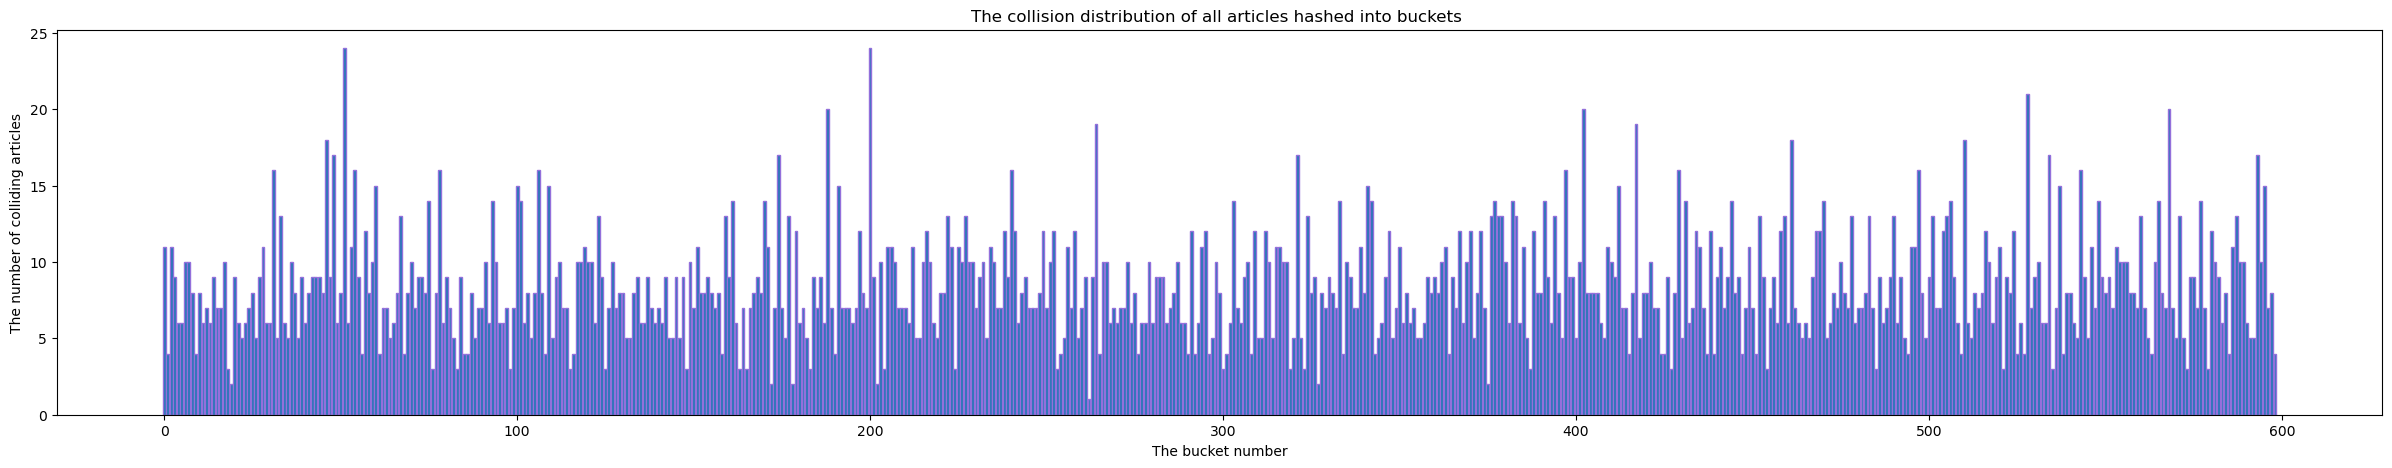

In [12]:
#plot the histogram and report the collision distribution of all articles.
fig, ax = plt.subplots(figsize=(30, 5))

keys = sorted(Hash.keys())
counter = []
for key, value in sorted(Hash.items()):
    counter.append(len(value))

plt.bar(range(len(counter)), counter, edgecolor='mediumpurple')

plt.title('The collision distribution of all articles hashed into buckets ')
plt.xlabel('The bucket number')
plt.ylabel('The number of colliding articles')

plt.show()

In [13]:
#Statistics analyst of distribution

max_no = max(counter)
max_ind = counter.index(max_no)

min_no = min(counter)
min_ind = counter.index(min_no)

zeros = 600 - len(counter) 

most_common_value, max_count = Counter(counter).most_common(1)[0]

In [14]:
print(f'The bucket number {max_ind} has most articles {max_no}')
print(f'The bucket number {min_ind} has least articles {min_no}')
print(f'In total, there are {zeros} buckets have 0 articles')
print(f'The bucket has {most_common_value} articles appearing most time; {max_count} buckets are in this situation')

The bucket number 51 has most articles 24
The bucket number 262 has least articles 1
In total, there are 1 buckets have 0 articles
The bucket has 7 articles appearing most time; 88 buckets are in this situation


### Section 2： Nearest Neighbor Search

#### A) Query the LSH tables and return the top-5 articles that have the highest estimated Jaccard similarities as the answer. Consider articles with an article ID range from 4996 to 5000 as the query set $Q$ = {4996, 4997, 4998, 4999, 5000}. To compute the search results for each query document $q ∈ Q$ by following the steps: 
    
>• **Step 1**: Find the set of articles $D_q$ that collide with $q ∈ Q$ in at least one hash table.

>• **Step 2**: Compute the estimated Jaccard similarity between $q ∈ Q$ and each article in $D_q$, denoted as $\hat{J}(d_i,q)$,where $d_i$ represents each article in the entire set of articles $D$.

>• **Step 3**: Report the top-5 articles with the highest estimated Jaccard similarity for query $q ∈ Q$. Arrange the list in descending order based on estimated Jaccard similarity. You need to provide five lists in total for the search results, each corresponding to one query $q ∈ Q$. In each list, the article with the highest estimated Jaccard similarity should be ranked at 1. Each row of the list should follow the following format for each query $q ∈ Q$:
                     
                     movie_id <TAB> estimated_Jaccard_sim <TAB> movie_genre

In [15]:
#derive the query document into 3 components, query id, query feature and query genre.
Q_id = M_id[4995:5000]
Q_feature = M_feature[4995:5000,] 
Q_gen = M_gen[4995:5000]

In [16]:
print(Q_id)
print(Q_feature)
print(Q_gen)

[4996 4997 4998 4999 5000]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
['drama' 'drama' 'drama' 'comedy' 'crime']


In [17]:
q = Q_feature.shape[0]
n = Q_feature.shape[1]

In [18]:
R_ID = HST_Search(Hash, Q_id )

In [19]:
for key,value in R_ID.items():   
    ID = [x + 1 for x in value ]
    print(f'The bucket ID is {key} and the collision articles are {ID}')

The bucket ID is 479 and the collision articles are [171, 995, 1052, 1063, 1204, 2038, 2159, 2521, 3083, 3089, 3637, 4361, 4996]
The bucket ID is 70 and the collision articles are [217, 994, 1041, 1135, 1185, 3053, 3400, 4549, 4973, 4997]
The bucket ID is 84 and the collision articles are [1166, 1748, 2366, 2405, 2423, 2715, 3176, 4777, 4998]
The bucket ID is 434 and the collision articles are [976, 1165, 2815, 4729, 4797, 4872, 4999]
The bucket ID is 171 and the collision articles are [482, 651, 861, 904, 1176, 1232, 1333, 2613, 2954, 3462, 5000]


In [20]:
Allind = list(R_ID.values())
C_sig = [row[ :-1 ] for row in Allind]

E_4996 = Estimated_Jaccard_Similarity(sigMtrix[:, 4995],sigMtrix[:,C_sig[0]])
E_4997 = Estimated_Jaccard_Similarity(sigMtrix[:, 4996],sigMtrix[:,C_sig[1]])
E_4998 = Estimated_Jaccard_Similarity(sigMtrix[:, 4997],sigMtrix[:,C_sig[2]])
E_4999 = Estimated_Jaccard_Similarity(sigMtrix[:, 4998],sigMtrix[:,C_sig[3]])
E_5000 = Estimated_Jaccard_Similarity(sigMtrix[:, 4999],sigMtrix[:,C_sig[4]])

In [21]:
print(f'The estimated jaccard similarity for {Q_id[0]} is: \n {E_4996}\n')
print(f'The estimated jaccard similarity for {Q_id[1]} is: \n {E_4997}\n')
print(f'The estimated jaccard similarity for {Q_id[2]} is: \n {E_4998}\n')
print(f'The estimated jaccard similarity for {Q_id[3]} is: \n {E_4999}\n')
print(f'The estimated jaccard similarity for {Q_id[4]} is: \n {E_5000}\n')

The estimated jaccard similarity for 4996 is: 
 [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

The estimated jaccard similarity for 4997 is: 
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

The estimated jaccard similarity for 4998 is: 
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

The estimated jaccard similarity for 4999 is: 
 [0.0, 0.0, 0.0, 0.5, 0.0, 0.0]

The estimated jaccard similarity for 5000 is: 
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]



In [22]:
def Sorting(Score, ID): #list 1: estimated/true jaccard similarity list2: article ID
    combined_list = list(zip(Score, ID))

    #Articles in descending order of similarity. 
    #If the same level of similarity, then the articles will be in ascending of articles id.
    sorted_list = sorted(combined_list,key = lambda x: (-x[0], x[1]))

    return sorted_list

In [23]:
list_4996 = Sorting(E_4996 , [x + 1 for x in C_sig[0]])
list_4997 = Sorting(E_4997 , [x + 1 for x in C_sig[1]])
list_4998 = Sorting(E_4998 , [x + 1 for x in C_sig[2]])
list_4999 = Sorting(E_4999 , [x + 1 for x in C_sig[3]])
list_5000 = Sorting(E_5000 , [x + 1 for x in C_sig[4]])

In [24]:
#select top-5 similarity score from every query
print(f'The top-5 estimated jaccard similarity for {Q_id[0]} is: \n {list_4996[:5]}\n')
print(f'The top-5 estimated jaccard similarity for {Q_id[1]} is: \n {list_4997[:5]}\n')
print(f'The top-5 estimated jaccard similarity for {Q_id[2]} is: \n {list_4998[:5]}\n')
print(f'The top-5 estimated jaccard similarity for {Q_id[3]} is: \n {list_4999[:5]}\n')
print(f'The top-5 estimated jaccard similarity for {Q_id[4]} is: \n {list_5000[:5]}\n')

The top-5 estimated jaccard similarity for 4996 is: 
 [(1.0, 1063), (0.0, 171), (0.0, 995), (0.0, 1052), (0.0, 1204)]

The top-5 estimated jaccard similarity for 4997 is: 
 [(0.0, 217), (0.0, 994), (0.0, 1041), (0.0, 1135), (0.0, 1185)]

The top-5 estimated jaccard similarity for 4998 is: 
 [(0.0, 1166), (0.0, 1748), (0.0, 2366), (0.0, 2405), (0.0, 2423)]

The top-5 estimated jaccard similarity for 4999 is: 
 [(0.5, 4729), (0.0, 976), (0.0, 1165), (0.0, 2815), (0.0, 4797)]

The top-5 estimated jaccard similarity for 5000 is: 
 [(0.0, 482), (0.0, 651), (0.0, 861), (0.0, 904), (0.0, 1176)]



In [25]:
def Reformat(query_id,Jaccard_sim,movie_genre):
    #query_id " query article id, Jaccard_sim:true / estimated jaccard similarity matrix ,movie_genre: the whole movie genre list

    print(f'The top-5 articles with highest jaccard similarity for {query_id} are :')

    ETS_similar = []
    for t in Jaccard_sim:
        movie = []

        #Articles id
        movie.append(str(t[1]))

        #Articles true/estimated jaccard similarity
        movie.append(str(t[0]))

        #Articles genre 
        movie.append(movie_genre[t[1] - 1])

        #Apply the separator as <tab>
        movie = "\t".join(movie)
        print(movie)
        ETS_similar.append(movie)

    print('\n')
    return ETS_similar       

In [26]:
ETS_4996 = Reformat(4996,list_4996[:5],M_gen)
ETS_4997 = Reformat(4997,list_4997[:5],M_gen)
ETS_4998 = Reformat(4998,list_4998[:5],M_gen)
ETS_4999 = Reformat(4999,list_4999[:5],M_gen)
ETS_5000 = Reformat(5000,list_5000[:5],M_gen)

The top-5 articles with highest jaccard similarity for 4996 are :
1063	1.0	serial
171	0.0	comedy drama
995	0.0	romance
1052	0.0	war
1204	0.0	serial


The top-5 articles with highest jaccard similarity for 4997 are :
217	0.0	western
994	0.0	comedy
1041	0.0	comedy thriller
1135	0.0	western
1185	0.0	romance


The top-5 articles with highest jaccard similarity for 4998 are :
1166	0.0	comedy
1748	0.0	serial
2366	0.0	drama
2405	0.0	drama
2423	0.0	drama


The top-5 articles with highest jaccard similarity for 4999 are :
4729	0.5	comedy
976	0.0	musical
1165	0.0	film noir
2815	0.0	drama
4797	0.0	thriller


The top-5 articles with highest jaccard similarity for 5000 are :
482	0.0	musical comedy
651	0.0	comedy, romance
861	0.0	drama
904	0.0	drama, adventure
1176	0.0	mystery




#### (B) Consider the same query set $Q$, compute true Jaccard similarity for query $q ∈ Q$ and all articles in the dataset $D$, i.e., $\hat{J}(d_i,q)$ for each article $d_i ∈ D$. Please report the list of top-5 articles with the highest true Jaccard similarity in descending order for each article $q ∈ Q$. Each row of the list should follow the format for each query $q ∈ Q$:
                       
                           movie_id <TAB> Jaccard_sim <TAB> movie_genre

In [27]:
T_4996 = True_Jaccard_Similarity(M_feature, 4995)
T_4997 = True_Jaccard_Similarity(M_feature, 4996)
T_4998 = True_Jaccard_Similarity(M_feature, 4997)
T_4999 = True_Jaccard_Similarity(M_feature, 4998)
T_5000 = True_Jaccard_Similarity(M_feature, 4999)

In [28]:
list2_4996 = Sorting(T_4996 ,np.delete(M_id, 4995))
list2_4997 = Sorting(T_4997 ,np.delete(M_id, 4996))
list2_4998 = Sorting(T_4998 ,np.delete(M_id, 4997))
list2_4999 = Sorting(T_4999 ,np.delete(M_id, 4998))
list2_5000 = Sorting(T_5000 ,np.delete(M_id, 4999))

In [29]:
#select top-5 similarity score from every query
print(f'The top-5 true jaccard similarity for {Q_id[0]} is: \n {list2_4996[:5]}\n')
print(f'The top-5 true jaccard similarity for {Q_id[1]} is: \n {list2_4997[:5]}\n')
print(f'The top-5 true jaccard similarity for {Q_id[2]} is: \n {list2_4998[:5]}\n')
print(f'The top-5 true jaccard similarity for {Q_id[3]} is: \n {list2_4999[:5]}\n')
print(f'The top-5 true jaccard similarity for {Q_id[4]} is: \n {list2_5000[:5]}\n')

The top-5 true jaccard similarity for 4996 is: 
 [(0.0632, 4566), (0.0601, 1689), (0.0591, 2441), (0.0588, 4681), (0.0583, 1008)]

The top-5 true jaccard similarity for 4997 is: 
 [(0.0791, 2656), (0.0784, 2551), (0.0777, 200), (0.0753, 3212), (0.0687, 2774)]

The top-5 true jaccard similarity for 4998 is: 
 [(0.0625, 4465), (0.0581, 3232), (0.0576, 1684), (0.0543, 114), (0.0538, 4989)]

The top-5 true jaccard similarity for 4999 is: 
 [(0.0581, 412), (0.0574, 4997), (0.0526, 200), (0.0519, 951), (0.0519, 1480)]

The top-5 true jaccard similarity for 5000 is: 
 [(0.0631, 1096), (0.0541, 3371), (0.0483, 3917), (0.0473, 1658), (0.0469, 3482)]



In [30]:
TRU_4996 = Reformat(4996,list2_4996[:5],M_gen)
TRU_4997 = Reformat(4997,list2_4997[:5],M_gen)
TRU_4998 = Reformat(4998,list2_4998[:5],M_gen)
TRU_4999 = Reformat(4999,list2_4999[:5],M_gen)
TRU_5000 = Reformat(5000,list2_5000[:5],M_gen)

The top-5 articles with highest jaccard similarity for 4996 are :
4566	0.0632	crime
1689	0.0601	film noir
2441	0.0591	crime
4681	0.0588	drama
1008	0.0583	crime


The top-5 articles with highest jaccard similarity for 4997 are :
2656	0.0791	drama
2551	0.0784	drama
200	0.0777	drama
3212	0.0753	comedy
2774	0.0687	comedy


The top-5 articles with highest jaccard similarity for 4998 are :
4465	0.0625	drama
3232	0.0581	western
1684	0.0576	film noir
114	0.0543	comedy
4989	0.0538	comedy


The top-5 articles with highest jaccard similarity for 4999 are :
412	0.0581	comedy
4997	0.0574	drama
200	0.0526	drama
951	0.0519	mystery
1480	0.0519	comedy


The top-5 articles with highest jaccard similarity for 5000 are :
1096	0.0631	serial
3371	0.0541	comedy
3917	0.0483	science fiction
1658	0.0473	film noir
3482	0.0469	comedy




### Section 3:Estimation Quality and Efficiency

#### (A) Investigate the impact of the hash size $k ∈ \{2, 4, 8, 16\}$ on the estimated Jaccard similarity estimation. Consider articles with an article ID range from 4001 to 5000 as the query set $Q$. For each value of hash size $k$, compute the mean absolute error (MAE) for the pairs of articles $(d_i, q)$, where $1 ≤ i ≤ |D|$ and $q ∈ Q$. Please plot the MAE of MinHash estimator on different values of $k$. In particular, MAEs with different values of $k$ on $x$-axis (i.e., 2, 4, 8, 16) and MAE values on $y$-axis. The MAE is defined as follows.

<center>MAE = $ \frac{\sum_{q\in Q}\  \sum^{|D|}_{i=1}\  |J(d_i,q)\ -\ \hat{J}(d_i,q)|}{|Q|\ \times \ |D|}$</center>


In [31]:
def Mean_Absolute_Error(ets_jaccard, true_jaccard): #ets_jaccard: estimated jaccard matrix, true_jaccard: true jaccard matrix

    mae = 0 

    #calculte the mean absolute error for the corresponding the estimated jaccard similarity of k size signature matrix 
    result_list = [abs(ets_jaccard[i] - true_jaccard[i] ) for i in range(len(true_jaccard))]
    
    mae = sum(result_list)

    return mae

In [32]:
start_2 = time.time()

a_2,b_2,p_2 = MinHash( 2, n)
HValue_2 = Simulated_Permutation(a_2,b_2,p_2, n, 2)
sigMtrix_2 = np.array(Signature_Matrix(M_feature, HValue_2, n,D))
print('The signature matrix has generated successfully when k = 2.\n')

Ek2_art_ID = []

print('We are calculating the estimated jaccard similarity, when k = 2 ...\n')
for art_ID in range(4000,5000):
   
    sample2_ID = sigMtrix_2[:,art_ID]
    group2_ID = np.delete(sigMtrix_2,art_ID,axis=1)
    Ek2_art_ID.append( Estimated_Jaccard_Similarity(sample2_ID,group2_ID))

print('The estimated jaccard similarity calculation has finished.\n')

end_2 = time.time()

when k = 2 ,the minHash function we generated are:

((52303693 * x + 146983796) mod 907747033) mod 39228)
((889008031 * x + 563640350) mod 907747033) mod 39228)


The signature matrix has generated successfully when k = 2.

We are calculating the estimated jaccard similarity, when k = 2 ...

The estimated jaccard similarity calculation has finished.



In [33]:
start_4 = time.time()

a_4,b_4,p_4 = MinHash( 4, n)
HValue_4 = Simulated_Permutation(a_4,b_4,p_4, n, 4)
sigMtrix_4 = np.array(Signature_Matrix(M_feature, HValue_4, n,D))
print('The signature matrix has generated successfully when k = 4.\n')

Ek4_art_ID = []

print('We are calculating the estimated jaccard similarity, when k = 4 ...\n')
for art_ID in range(4000,5000):
   
    sample4_ID = sigMtrix_4[:,art_ID]
    group4_ID = np.delete(sigMtrix_4,art_ID,axis=1)
    Ek4_art_ID.append( Estimated_Jaccard_Similarity(sample4_ID,group4_ID))

print('The estimated jaccard similarity calculation has finished.\n')

end_4 = time.time()

when k = 4 ,the minHash function we generated are:

((287976753 * x + 131266746) mod 592132939) mod 39228)
((424951280 * x + 574417588) mod 592132939) mod 39228)
((122904244 * x + 238189813) mod 592132939) mod 39228)
((89652126 * x + 531820650) mod 592132939) mod 39228)


The signature matrix has generated successfully when k = 4.

We are calculating the estimated jaccard similarity, when k = 4 ...

The estimated jaccard similarity calculation has finished.



In [34]:
start_8 = time.time()

a_8,b_8,p_8 = MinHash( 8, n)
HValue_8 = Simulated_Permutation(a_8,b_8,p_8, n, 8)
sigMtrix_8 = np.array(Signature_Matrix(M_feature, HValue_8, n,D))
print('The signature matrix has generated successfully when k = 8.\n')

Ek8_art_ID = []

print('We are calculating the estimated jaccard similarity, when k = 8 ...\n')
for art_ID in range(4000,5000):
   
    sample8_ID = sigMtrix_8[:,art_ID]
    group8_ID = np.delete(sigMtrix_8,art_ID,axis=1)
    Ek8_art_ID.append( Estimated_Jaccard_Similarity(sample8_ID,group8_ID))

print('The estimated jaccard similarity calculation has finished.\n')

end_8 = time.time()

when k = 8 ,the minHash function we generated are:

((491478668 * x + 333313723) mod 665218661) mod 39228)
((74363632 * x + 178211087) mod 665218661) mod 39228)
((196614448 * x + 220637743) mod 665218661) mod 39228)
((138973372 * x + 649208305) mod 665218661) mod 39228)
((647574997 * x + 401403282) mod 665218661) mod 39228)
((93587059 * x + 575722036) mod 665218661) mod 39228)
((12231470 * x + 240648046) mod 665218661) mod 39228)
((58332696 * x + 340876224) mod 665218661) mod 39228)


The signature matrix has generated successfully when k = 8.

We are calculating the estimated jaccard similarity, when k = 8 ...

The estimated jaccard similarity calculation has finished.



In [35]:
start_16 = time.time()

a_16,b_16,p_16 = MinHash( 16, n)
HValue_16 = Simulated_Permutation(a_16,b_16,p_16, n, 16)
sigMtrix_16 = np.array(Signature_Matrix(M_feature, HValue_16, n,D))
print('The signature matrix has generated successfully when k = 16.\n')

Ek16_art_ID = []

print('We are calculating the estimated jaccard similarity, when k = 16 ...\n')
for art_ID in range(4000,5000):
   
    sample16_ID = sigMtrix_16[:,art_ID]
    group16_ID = np.delete(sigMtrix_16,art_ID,axis=1)
    Ek16_art_ID.append( Estimated_Jaccard_Similarity(sample16_ID,group16_ID))
print('The estimated jaccard similarity calculation has finished.\n')

end_16 = time.time()

when k = 16 ,the minHash function we generated are:

((149380651 * x + 66041847) mod 453371363) mod 39228)
((437386789 * x + 363647357) mod 453371363) mod 39228)
((228979542 * x + 432405341) mod 453371363) mod 39228)
((327887303 * x + 58222385) mod 453371363) mod 39228)
((268857787 * x + 46797054) mod 453371363) mod 39228)
((44521018 * x + 103657316) mod 453371363) mod 39228)
((80312808 * x + 312059547) mod 453371363) mod 39228)
((18906676 * x + 314985543) mod 453371363) mod 39228)
((165370063 * x + 12408540) mod 453371363) mod 39228)
((155305774 * x + 365810145) mod 453371363) mod 39228)
((392291583 * x + 210995392) mod 453371363) mod 39228)
((32104486 * x + 186169595) mod 453371363) mod 39228)
((445664067 * x + 55415180) mod 453371363) mod 39228)
((422558999 * x + 445988141) mod 453371363) mod 39228)
((374292446 * x + 383232829) mod 453371363) mod 39228)
((172048644 * x + 218900125) mod 453371363) mod 39228)


The signature matrix has generated successfully when k = 16.

We are calcu

In [36]:
start = time.time()

Tk_art_ID = []

print('We are calculating the true jaccard similarity...\n')
for art_IDX in range(4000,5000):
    Tk_art_ID.append(True_Jaccard_Similarity(M_feature, art_IDX))

print('The true jaccard similarity calculation has finished.\n')

end = time.time()


We are calculating the true jaccard similarity...

The true jaccard similarity calculation has finished.



In [37]:
SUM_2 = []
SUM_4 = []
SUM_8 = []
SUM_16 = []

for i in range(0,1000):
    SUM_2.append( Mean_Absolute_Error(Ek2_art_ID[i], Tk_art_ID[i]))
    SUM_4.append( Mean_Absolute_Error(Ek4_art_ID[i], Tk_art_ID[i]))
    SUM_8.append( Mean_Absolute_Error(Ek8_art_ID[i], Tk_art_ID[i]))
    SUM_16.append( Mean_Absolute_Error(Ek16_art_ID[i], Tk_art_ID[i]))
    

In [38]:
MAE_2 = sum(SUM_2) / (5000 * 1000)
MAE_4 = sum(SUM_4) / (5000 * 1000)
MAE_8 = sum(SUM_8) / (5000 * 1000)
MAE_16 = sum(SUM_16) / (5000 * 1000)

In [39]:
y = []
X = [2,4,8,16]

y.append(MAE_2)
y.append(MAE_4)
y.append(MAE_8) 
y.append(MAE_16)

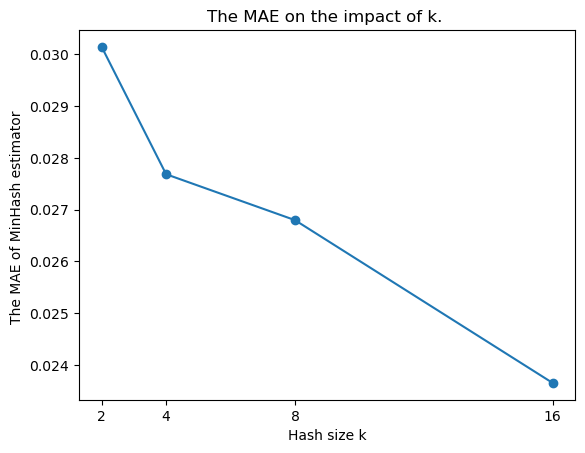

In [40]:
plt.plot(X , y, marker ='o')

labels = ['2','4','8','16']
plt.xticks(X, labels)

plt.title('The MAE on the impact of k. ')
plt.xlabel('Hash size k')
plt.ylabel('The MAE of MinHash estimator ')

plt.show()

#### Comments: 
Under this random seed setting, while the size of Hash size k increases, the mean absolute errors decrease. The maximum MAE is more than 0.028 and the minimum MAE is less than 0.023 on average level. It is significant that size k of the hash function impacts the error rate.  

#### (B) Consider articles with an article ID range from 4001 to 5000 as the query set $Q$ with $k = 2$. Compare the query time in Question 2(A) and Question 2(B) on average across the query set $Q$ in milliseconds and comment on their differences (if any).

In [41]:
time_consuming_EK2 = end_2 - start_2
time_consuming_EK4 = end_4 - start_4
time_consuming_EK8 = end_8 - start_8
time_consuming_EK16 = end_16 - start_16

time_consuming_TK = end - start

In [42]:
query_size = (5000 - 4000) * 5000

In [43]:
# The time consuming for true jaccard similarity was calculted in question 3(A) 
time_consuming_EK2_AVG = time_consuming_EK2 * 1000 / query_size
time_consuming_EK4_AVG = time_consuming_EK4 * 1000 / query_size
time_consuming_EK8_AVG = time_consuming_EK8 * 1000 / query_size
time_consuming_EK16_AVG = time_consuming_EK16 * 1000 / query_size

time_consuming_TK_AVG = time_consuming_TK * 1000 / query_size

In [44]:
print('The query time on average across the query set about estimated jaccard similarity when k = 2 is {:.3f} milliseconds.\n'.format(time_consuming_EK2_AVG ))
print('The query time on average across the query set about estimated jaccard similarity when k = 4 is {:.3f} milliseconds.\n'.format(time_consuming_EK4_AVG ))
print('The query time on average across the query set about estimated jaccard similarity when k = 8 is {:.3f} milliseconds.\n'.format(time_consuming_EK8_AVG ))
print('The query time on average across the query set about estimated jaccard similarity when k = 16 is {:.3f} milliseconds.\n'.format(time_consuming_EK16_AVG ))

print('The query time on average across the query set about true jaccard similarity is {:.3f} milliseconds.\n'.format(time_consuming_TK_AVG ))

The query time on average across the query set about estimated jaccard similarity when k = 2 is 0.009 milliseconds.

The query time on average across the query set about estimated jaccard similarity when k = 4 is 0.017 milliseconds.

The query time on average across the query set about estimated jaccard similarity when k = 8 is 0.033 milliseconds.

The query time on average across the query set about estimated jaccard similarity when k = 16 is 0.068 milliseconds.

The query time on average across the query set about true jaccard similarity is 2.901 milliseconds.

